#TODO
- what are we going to do with the outliers in our data 
- What do we do with the embarked parameter? keep it? drop it? 

Things done to the data:
- Mapped Sex to be a binary classification with male = 1 and female = 0
- Imputed Missing Values. 
  - Cabin was removed due to having to many missing values
  - We filled missing Age values with the mean of the Age values
  - We also filled missing Embarked values with the mode of the embarked values.

Info about the data:
- Pclass (Passenger Class): 
  - refers to the class of the passengers. Pclass = 1 was upper class Pclass = 2 middle class Pclass = 3 lower class
  - Pclass plays a significant role the the survival rate of passengers. likely because they had better access to life boats.
- Parch (Parents and Children):
  - Parch = 0: The passenger had no parents or children with them
  - Parch = 1: the passenger was treveling either one parent or one child
  - Parch = 2: The passenger had two parents/children, and so on.
- SibSp (Sibling and Spouses)
  - SibSp = 0: The passenger had no siblings or spouse with them.
  - SibSp = 1: The passenger was traveling with one sibling or spouse.
  - SibSp = 2: The passenger had two siblings or a combination of siblings and spouse with them, and so on.
- Embarked
  - S: Southampton
  - C: Cherbourg
  - Q: Queenstown

Some EDA (More should follow):
- Correlation Matrix
  - Survived has a negative correlation with Pclass at -0.34 meaning that as pclass increase (the lower class status you are) the lower your chances of survival are.
  - Fare is positively correlated with survival 0.26 which tells us that people who paid more for their ticket had better odds of surviving. Likely because they are wealthy and are grouped in pclass=1.
  - SibSp and Parch have a slight positive correlation with survival. which tells us that passengers with family members onboard might have had slighly better survival chances.
- Sex vs. Survival:
  - Woman had a much higher survival rate (~75%) compared to males (~20%)
- Pclass vs Survival
  - 1st class had the highest survival rate ~65%
  - 3rd class had the lowers survival rate >30%
  - The survival rate generally decreases as passenger class increases. (wealthier passengers had a higher chance of living)
- Age vs Survival
  - Children (under 12) had the highest survival rate ~60%
  - Seniors (over 60) had the lowest survival rate

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
   

/var/folders/4j/2vwq5lfj3m3399dm2npr95l00000gn/T/ipykernel_24381/1651133485.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/var/folders/4j/2vwq5lfj3m3399dm2npr95l00000gn/T/ipykernel_24381/1651133485.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values 

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


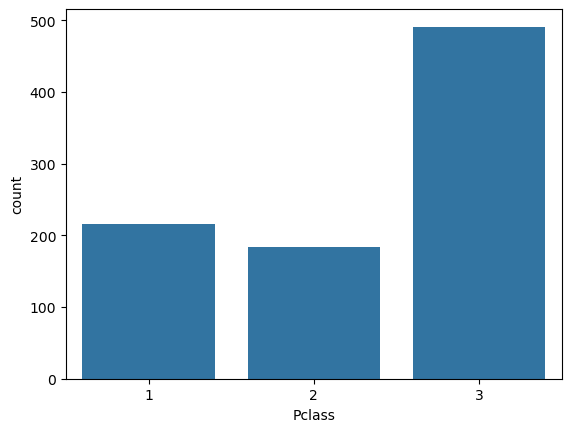

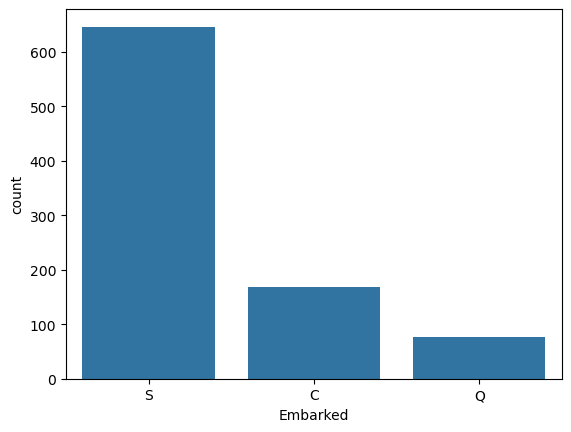

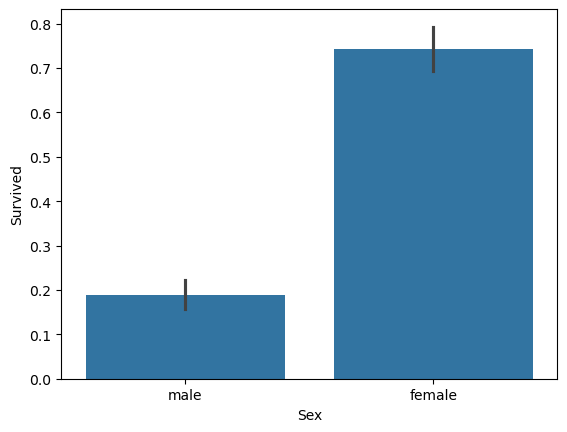

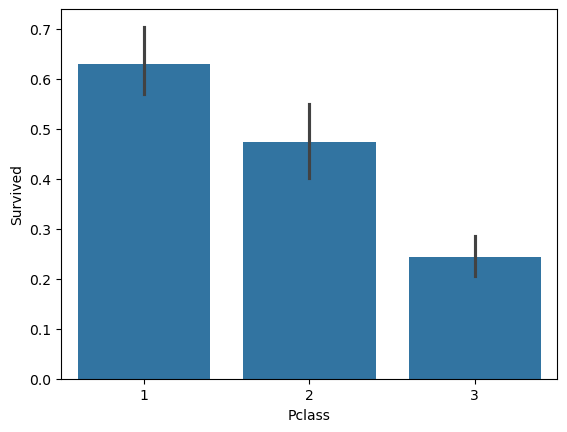

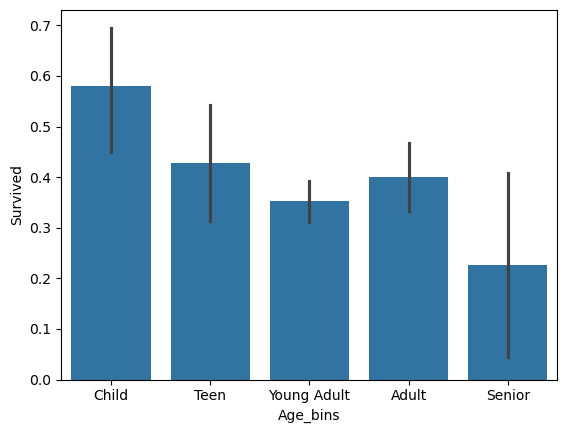

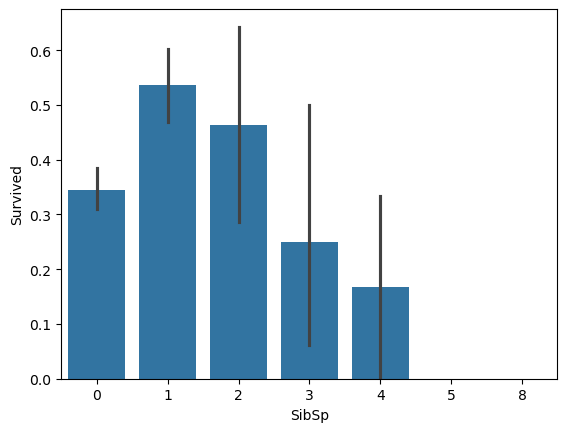

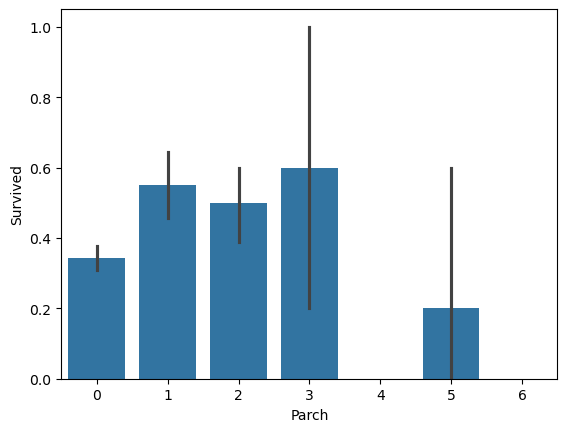

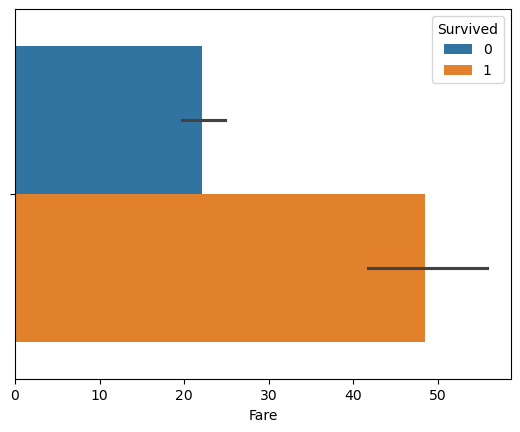

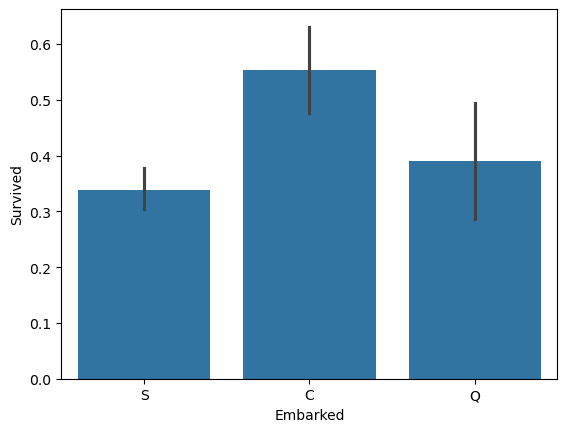

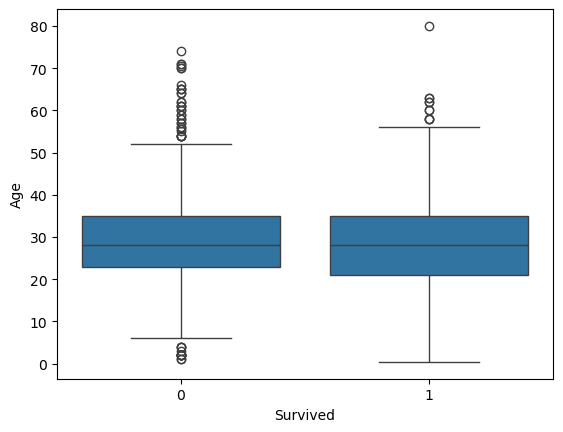

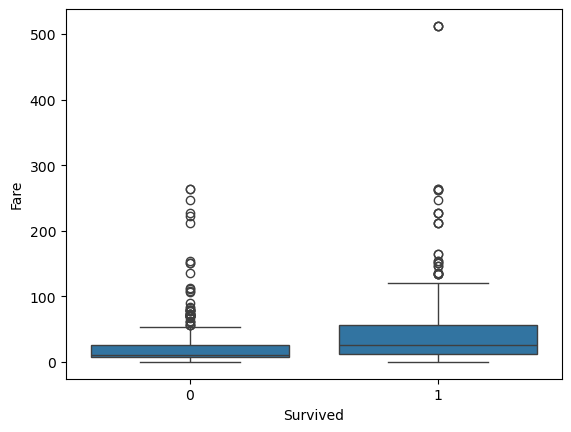

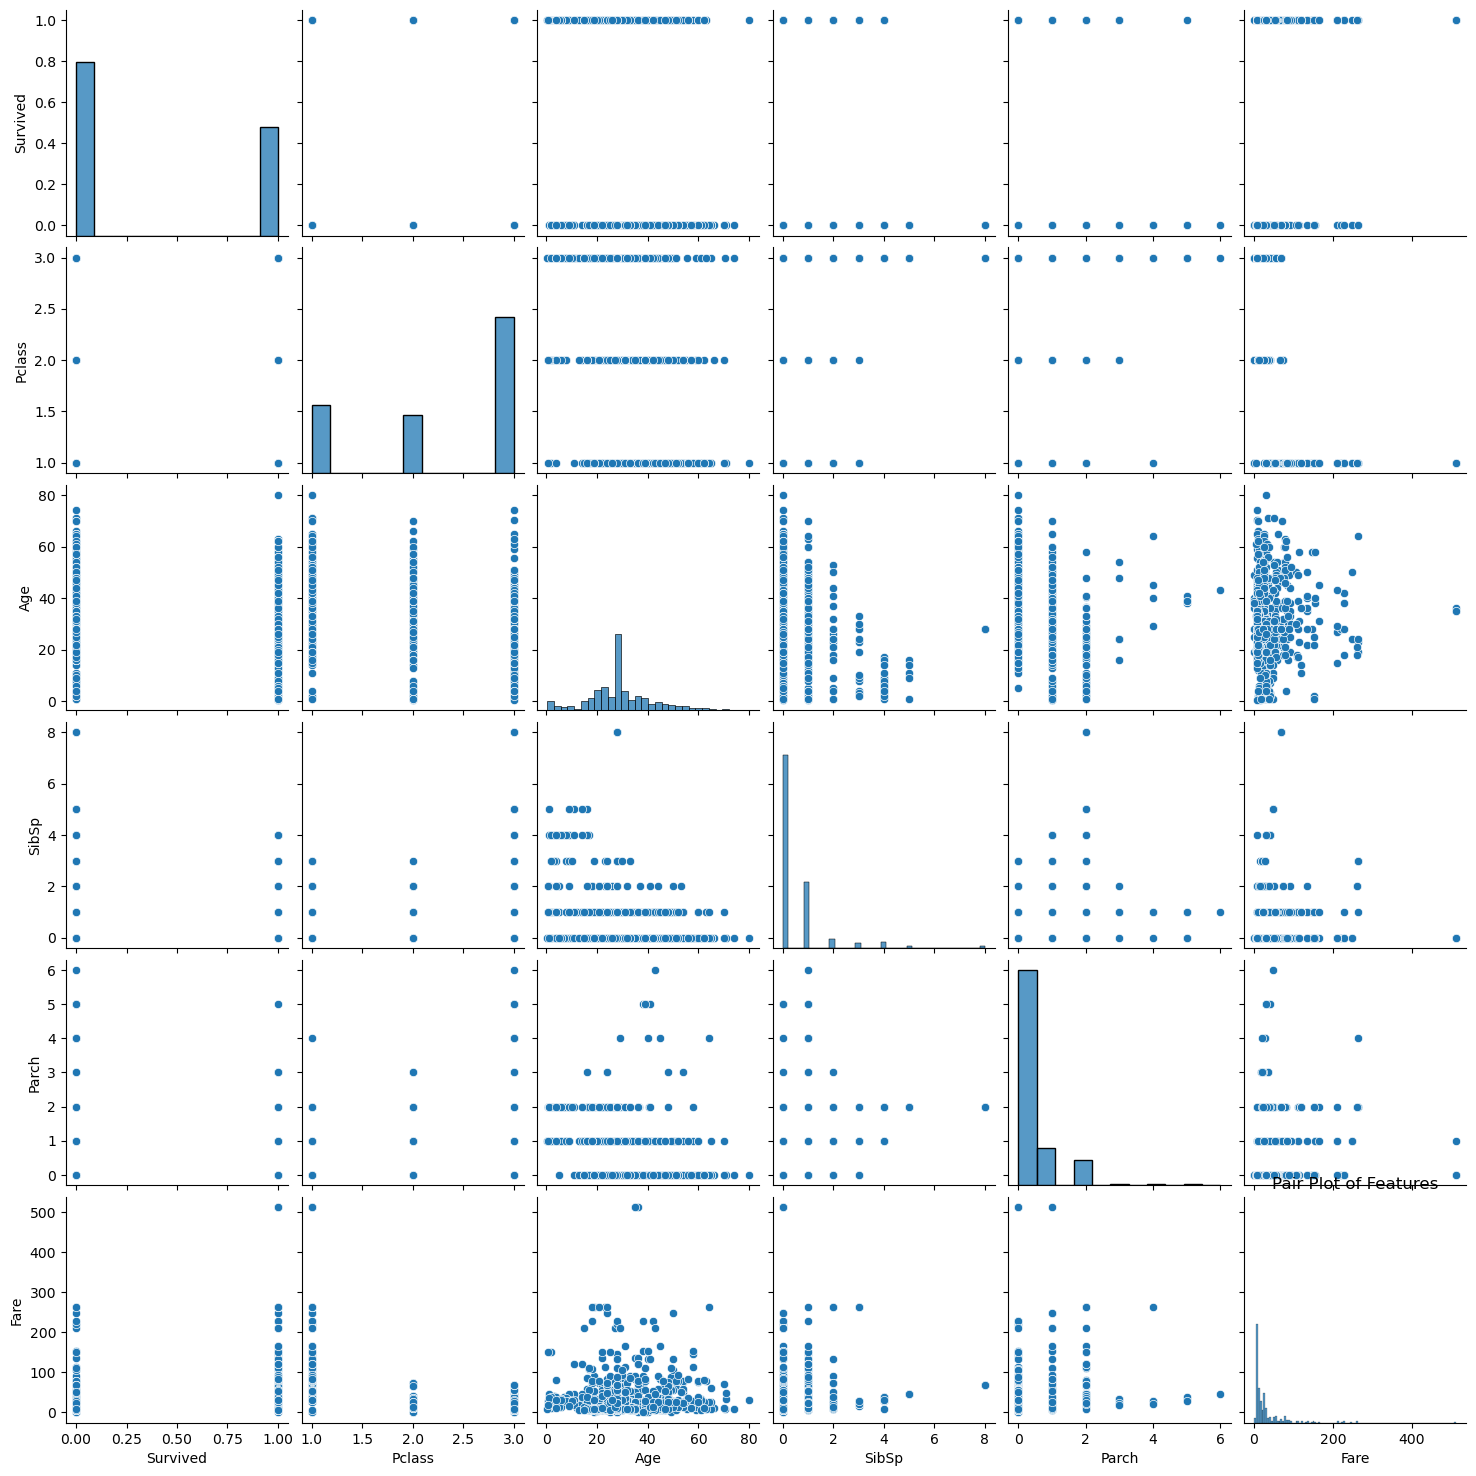

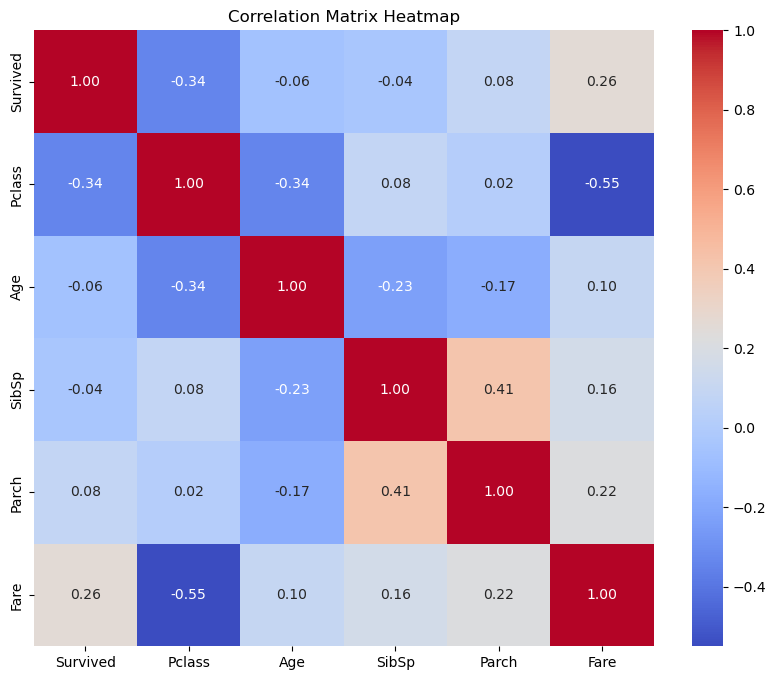

In [128]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# load dataset
df = pd.read_csv('Titanic-Dataset.csv')

df.info()

# Check for missing values
print(df.isnull().sum())

# Summary statistics for numeric features
print(df.describe())

# Impute missing values for Age by median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Impute missing values for Embarked by mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop Cabin column
df.drop('Cabin', axis=1, inplace=True)
df.drop('PassengerId', axis=1, inplace=True)

#df["Sex"] = df["Sex"].map({"male": 1, "female": 0})

display(df.head(5))


sns.countplot(data=df, x="Pclass")
plt.show()

sns.countplot(data=df, x="Embarked")
plt.show()

# Show survival rate by Sex
sns.barplot(x='Sex', y='Survived', data=df)
plt.show()

# Survival rate by Pclass
sns.barplot(x='Pclass', y='Survived', data=df)
plt.show()

# Survival rate by Age
df['Age_bins'] = pd.cut(df['Age'], bins=[0, 12, 18, 35, 60, 80], labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior'])
sns.barplot(x='Age_bins', y='Survived', data=df)
plt.show()

# Survival rate by SibSp
sns.barplot(x='SibSp', y='Survived', data=df)
plt.show()

# Survival rate by Parch
sns.barplot(x='Parch', y='Survived', data=df)
plt.show()

# Survival rate by Fare
sns.barplot(data=df, x='Fare', hue='Survived')
plt.show()

# Survival rate by Embarked
sns.barplot(x='Embarked', y='Survived', data=df)
plt.show()

## Detect Outliers
# Boxplot for Age
sns.boxplot(data=df, x='Survived', y='Age')
plt.show()

# Boxplot for Fare
sns.boxplot(data=df, x='Survived', y='Fare')
plt.show()

# Paired plot for numerical features
# Measure the relationships between different features
# Visualize relationships using scatter plots
sns.pairplot(df)
plt.title('Pair Plot of Features')
plt.show()


#heatmap for correlation matrix
plt.figure(figsize=(10, 8))

correlation_matrix = np.corrcoef(df.select_dtypes(include=[np.number]).values.T)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", xticklabels=df.select_dtypes(include=[np.number]).columns, yticklabels=df.select_dtypes(include=[np.number]).columns)
plt.title('Correlation Matrix Heatmap')
plt.show()




# Using Stochastic Gradient Descent to train model

dataset size:891


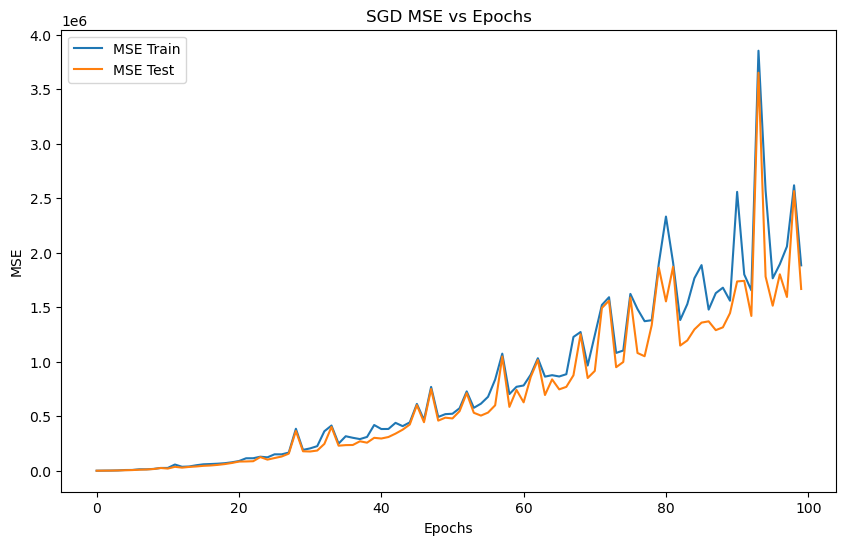

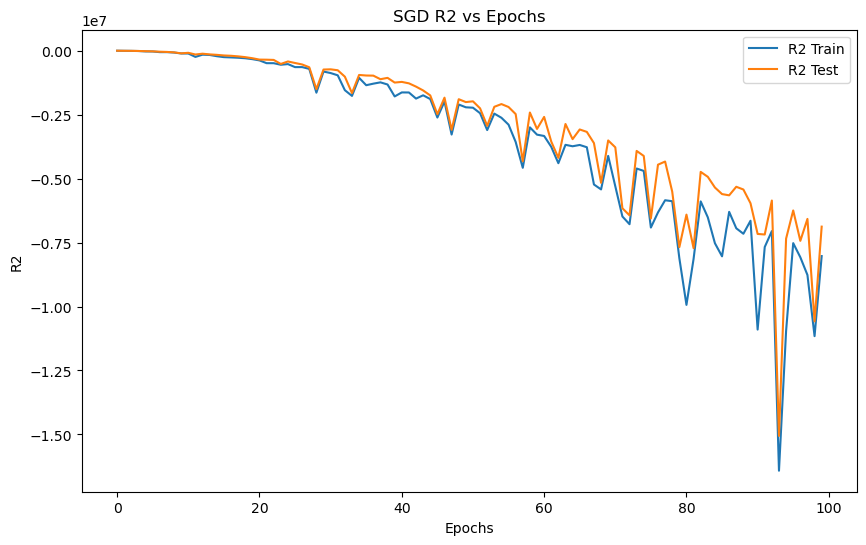

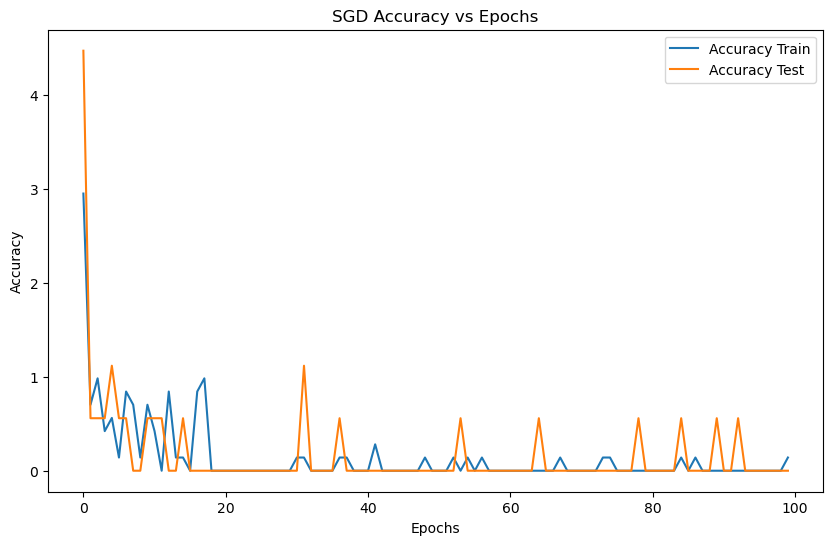

In [129]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

# Preprocessing the dataset
df["Sex"] = df["Sex"].map({"male": 1, "female": 0})

# Dropping unnecessary columns
X = df.drop(['Survived', 'Name', 'Ticket', 'Embarked', 'Age_bins'], axis=1)
y = df['Survived']
print("dataset size:{}".format(X.shape[0]))

# Spliting the dataset into train and test sets [80:20]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Stansdardizing the attributes of the Dataset
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Add the column of 1 values to X
X_train_scaled = np.c_[np.ones((X_train_scaled.shape[0], 1)), X_train_scaled]
X_test_scaled = np.c_[np.ones((X_test_scaled.shape[0], 1)), X_test_scaled]


# Linear Regression Model
class LinearRegression:
    def __init__(self):
        self.theta = None
    
    def fit(self, X, y, lr=0.01, epochs=20, batch_size=None, verbose=True):
        self.theta = np.random.randn(X.shape[1])
        # size of the dataset
        m = X.shape[0]
        loss_history = []
        
        # Initialize the lists to store the MSE and R2 scores
        MSE_train = []
        MSE_test = []
        R2_train = []
        R2_test = []
        accuracy_train = []
        accuracy_test = []

        for epoch in range(epochs):
            num_batches = m // batch_size if batch_size else 1
            # Iterate over the batches in each epoch
            for batch in range(num_batches):
                # If a batch_size is provided, it means to perform mini-batch gradient descent, where the training dataset is divided into smaller batches, and each batch is used to update the model's parameters.
                if batch_size:
                    #This line generates random indices from 0 to m (the total number of samples in the training set) without replacement. m is the size of the training dataset. The number of indices generated is equal to the batch_size.
                    indices = np.random.choice(m, batch_size)
                    # creates a mini-batch of input features for training
                    X_batch = X[indices]
                    # selects the corresponding subset of y for the mini-batch of input features
                    y_batch = y[indices]
                else:
                    # performing full-batch-gradient descent 
                    X_batch = X
                    y_batch = y
                    
                # generating the predictions on X_batch
                y_pred = X_batch.dot(self.theta)
                error = y_pred - y_batch
            
                # computing the gradient of the loss function
                gradient = 2 * X_batch.T.dot(error)
                avg_gradient = sum(gradient)/ X_batch.shape[0]
            
                # updating the weights with the computed gradient
                self.theta -= lr * avg_gradient

            # Generate the predictions on the training and test sets
            y_train_pred = X.dot(self.theta)
            y_test_pred = X_test_scaled.dot(self.theta)
            
            # Calculate the MSE and R2 scores
            mse_train = mean_squared_error(y_train, y_train_pred)
            mse_test = mean_squared_error(y_test, y_test_pred)
            r2_train = r2_score(y_train, y_train_pred)
            r2_test = r2_score(y_test, y_test_pred)
            
            # Append the scores to the lists
            MSE_train.append(mse_train)
            MSE_test.append(mse_test)
            R2_train.append(r2_train)
            R2_test.append(r2_test)
            accuracy_train.append(accuracy_score(y_train, np.round(y_train_pred)))
            accuracy_test.append(accuracy_score(y_test, np.round(y_test_pred)))
        
        return MSE_train, MSE_test, R2_train, R2_test, accuracy_train, accuracy_test



# Initialize the model
SGD_model = LinearRegression()

# Set the number of epochs
epochs = 100

# Train the model on batch_size=1 to for Stochastic Gradient Descent
SGD_MSE_train, SGD_MSE_test, SGD_R2_train, SGD_R2_test, accuracy_train, accuracy_test \
  = SGD_model.fit(X_train_scaled, X_train_scaled, lr=0.01, epochs=epochs, batch_size=1)


# Plot the MSE scores
plt.figure(figsize=(10, 6))
plt.plot(range(epochs), SGD_MSE_train, label='MSE Train')
plt.plot(range(epochs), SGD_MSE_test, label='MSE Test')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.title('SGD MSE vs Epochs')
plt.show()

# Plot the R2 scores
plt.figure(figsize=(10, 6))
plt.plot(range(epochs), SGD_R2_train, label='R2 Train')
plt.plot(range(epochs), SGD_R2_test, label='R2 Test')
plt.xlabel('Epochs')
plt.ylabel('R2')
plt.legend()
plt.title('SGD R2 vs Epochs')
plt.show()

# Plot the Accuracy scores
plt.figure(figsize=(10, 6))
# Convert accuracy to percentage by multiplying by 100
plt.plot(range(epochs), [a * 100 for a in accuracy_train], label='Accuracy Train')
plt.plot(range(epochs), [a * 100 for a in accuracy_test], label='Accuracy Test')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('SGD Accuracy vs Epochs')
plt.show()





As you can see this model performs very poorly. As the Epochs increase the R2 and MSE increases which indicates that the model is overfitting. 

There are some steps we can take to increase the models performance:
- Use K-cross validation
- remove outliers in the dataset
- Add regularization (L1 or L2)
- Decrease the learning rate
- Get more datapoints (impossible)

# K-Cross Validation

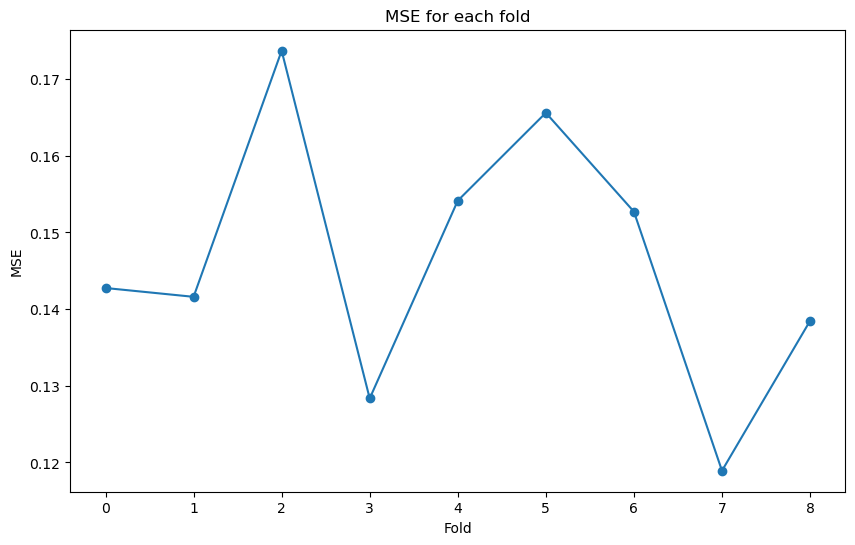

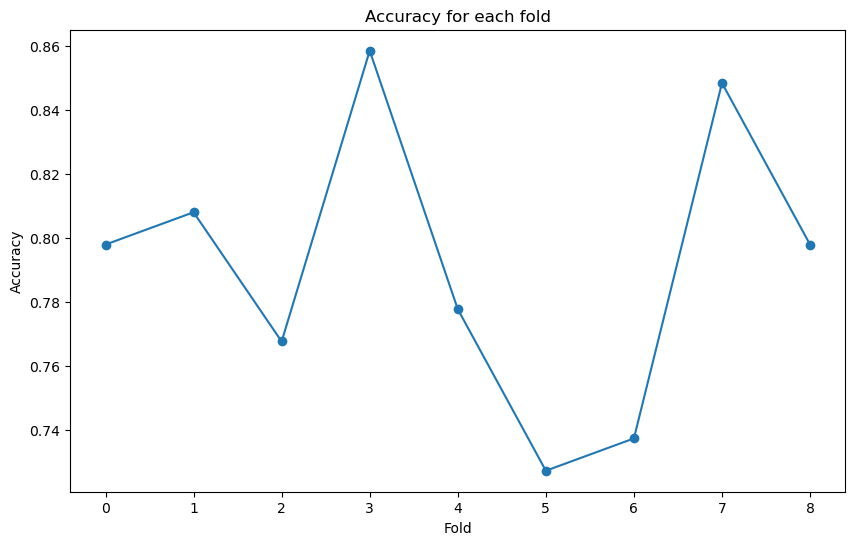

Best model:  [-0.14308806 -0.24357129 -0.07169825 -0.04747973 -0.02006254  0.01613685]
MSE of best model:  0.11892666868356866
accuracy_score of best model:  0.8484848484848485

Mean MSE:  0.14624776581382357
Mean R2:  0.3704014708306571


In [130]:
from sklearn.linear_model import LinearRegression

mean = X.mean()
std = X.std()
normalized_X = (X - mean) / std

# Initialize the number of folds for cross-validation
k = 9

# Calculate the size of each fold
fold_size = len(normalized_X) // k

# Initialize the lists to store the MSE and R2 scores
MSE_scores = []
R2_scores = []
accuracy_scores = []
models = []

for i in range(k):
  # Get the testing fold and the training folds
  # Example 
  # | --- --- --- --- *** --- --- --- --- --- --- --- |
  #    0   1   2   3   4   5   6   7   8   9   10  11
  # * represents the testing fold
  # - represents the training fold
  # i = 0: 
  # X_test_range = [i * fold_size : (i + 1) * fold_size]
  # X_train_range = [: i * fold_size] + [(i + 1) * fold_size : ]
    
  # Test fold
  X_test = normalized_X[i * fold_size:(i + 1) * fold_size]
  y_test = y[i * fold_size:(i + 1) * fold_size]
  # Train fold
  X_train = pd.concat([normalized_X[:i * fold_size], normalized_X[(i + 1) * fold_size:]])
  y_train = np.concatenate([y[:i * fold_size], y[(i + 1) * fold_size:]])
  
  # Train the model
  model = LinearRegression()
  model.fit(X_train, y_train)
  models.append(model)
  
  # Predict the target values
  y_pred = model.predict(X_test)
  
  # Calculate the MSE and R2 scores
  mse = mean_squared_error(y_test, y_pred)
  MSE_scores.append(mse)
  r2 = r2_score(y_test, y_pred)
  R2_scores.append(r2)
  accuracy_scores.append(accuracy_score(y_test, np.round(y_pred)))

# Plot the MSE scores for each fold
plt.figure(figsize=(10, 6))
plt.plot(range(k), MSE_scores, marker='o')
plt.xlabel('Fold')
plt.ylabel('MSE')
plt.title('MSE for each fold')
plt.show() 

# Plot the Accuracy scores for each fold
plt.figure(figsize=(10, 6))
plt.plot(range(k), accuracy_scores, marker='o')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Accuracy for each fold')
plt.show() 

# Find the model with the lowest MSE
best_model = models[np.argmin(MSE_scores)]
print("Best model: ", best_model.coef_)
print("MSE of best model: ", min(MSE_scores))
print("accuracy_score of best model: ", accuracy_scores[np.argmin(MSE_scores)])



# Calculate the mean MSE and R2 scores
mean_MSE = np.mean(MSE_scores)
mean_R2 = np.mean(R2_scores)
print()
print("Mean MSE: ", mean_MSE)
print("Mean R2: ", mean_R2)
